In [19]:
%%capture
#%matplotlib inline
%matplotlib notebook

%load_ext autoreload
%autoreload 2

%reset -f

import os, sys
import numpy as np

import pylab as plt
import matplotlib as mpl
import scipy.io

#plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams.update({"axes.grid" : True})
#plt.rcParams['font.family'] = 'DeJavu Serif'
#plt.rcParams['font.serif'] = ['Times New Roman']

#plt.rcParams.update({'font.size': 14})

/home/giachero/work/repos-github/twpazer/src/twpazer/sazer.py:44: DeprecationWarning: invalid escape sequence '\m'
  'barunit'  : '$\mu$m',
/home/giachero/work/repos-github/twpazer/src/twpazer/sazer.py:45: DeprecationWarning: invalid escape sequence '\e'
  'barvar'   : '$\ell$',


# Simulation as a function ot the Kinetic Inductance $L_k$

In [20]:
from twpazer.sazer import Z0zer

In [21]:
pathname  = '/home/giachero/gsbox/kids_rd/DARTWARS/sonnet-sim/IMS-NIST/v2/simdata/8.5'
filenameC = 'fishbone-microstrip_d100_eps8.5_l11.0um_s1um_w1um_d100nm_320cells_C_geo_response_d_20240726_145417.sid'
filenameL = 'fishbone-microstrip_d100_eps8.5_l11.0um_s1um_w1um_d100nm_320cells_L_geo_response_d_20240726_145417.sid'

In [34]:
options = {'fmin'      : 0,         
           'issave'    : 1,          
           'isformat'  : 0,        
           'target'    : 'Lk',          
           'Lnorm'     : 1e12,          
           'Lunit'     : 'pH',          
           'Cnorm'     : 1e15,          
           'Cunit'     : 'fF',          
           't'         : 10,             
           's'         : 1,          
           'w'         : 1,          
           'eps'       : 8.5,           
           'loss'      : 0,           
           'd'         : 100,            
           'ncell'     : 320,          
           'nfit'      : 1000, 
           'barname'   : 'Kinetic Inductance',
           'barvar'    : '$L_k$', 
           'barunit'   : 'pH/sq', 
           'fittypeC'  : 'poly', 
           'fittypeL'  : 'poly',}

/home/giachero/work/repos-github/twpazer/src/twpazer/sazer.py:44: DeprecationWarning: invalid escape sequence '\m'
  'barunit'  : '$\mu$m',
/home/giachero/work/repos-github/twpazer/src/twpazer/sazer.py:45: DeprecationWarning: invalid escape sequence '\e'
  'barvar'   : '$\ell$',


In [35]:
z0zer = Z0zer(os.path.join(pathname,filenameL), os.path.join(pathname,filenameC), **options)

In [36]:
z0zer.compute()

(__computeLC) Compute L
(__computeX) Fitting L vs freq with poly
(__computeX) Fitting L vs freq with poly
(__computeX) Fitting L vs freq with poly
(__computeX) Fitting L vs freq with poly
(__computeX) Fitting L vs freq with poly
(__computeX) Fitting L vs freq with poly
(__computeLC) Compute C
(__computeX) Fitting C vs freq with poly
(__computeX) Fitting C vs freq with poly
(__computeX) Fitting C vs freq with poly
(__computeX) Fitting C vs freq with poly
(__computeX) Fitting C vs freq with poly
(__computeX) Fitting C vs freq with poly
(__computeZ0) Compute Z0
(__fitLC) Fitting L0
(__fitX) L0 from polynomial fit : L = 0.65 pH
(__fitLC) Fitting C0
(__fitX) C0 from polynomial fit : C = 22.76 fF


/home/giachero/work/repos-github/twpazer/src/twpazer/utils.py:135: RuntimeWarning: divide by zero encountered in divide
  'C2'  : -1/(2*np.pi*Y['freq']*np.imag(1/Y['Y22'])),
/home/giachero/work/repos-github/twpazer/src/twpazer/utils.py:137: RuntimeWarning: divide by zero encountered in divide
  'L2'  : -1/(2*np.pi*Y['freq'])*np.imag(1/Y['Y21'])
/home/giachero/work/repos-github/twpazer/src/twpazer/utils.py:137: RuntimeWarning: invalid value encountered in divide
  'L2'  : -1/(2*np.pi*Y['freq'])*np.imag(1/Y['Y21'])


In [31]:
z0zer.results()[25]['C'].keys()

dict_keys(['C', 'Cfit', 'C0', 'freq', 'freq_fit', 'p'])

<IPython.core.display.Javascript object>


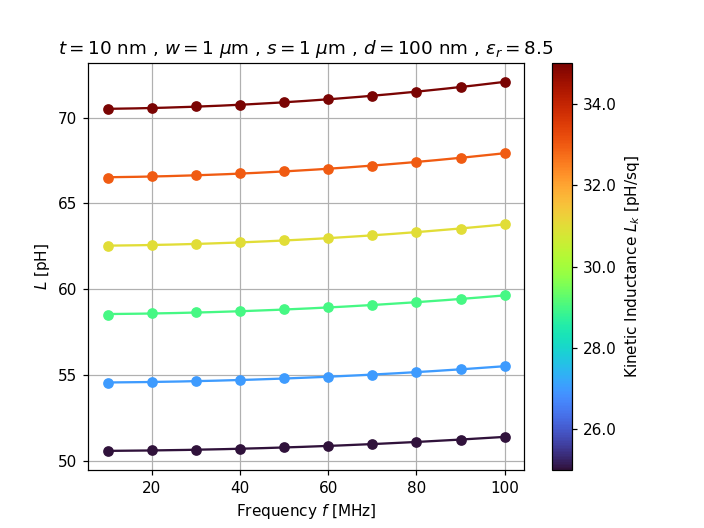

<IPython.core.display.Javascript object>


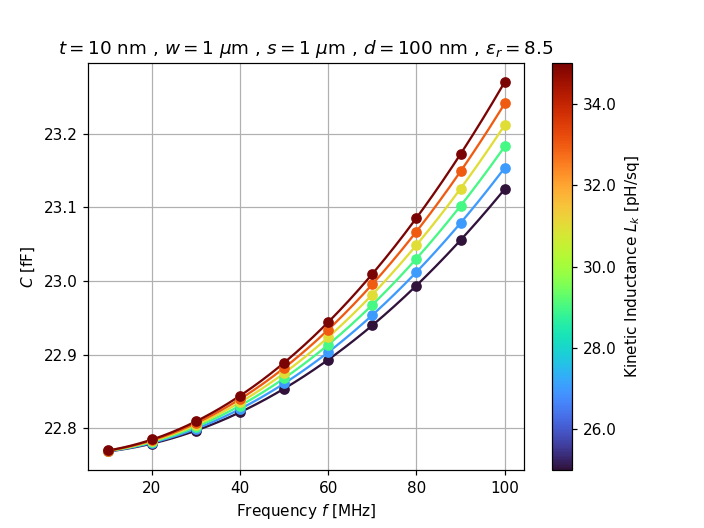

<IPython.core.display.Javascript object>


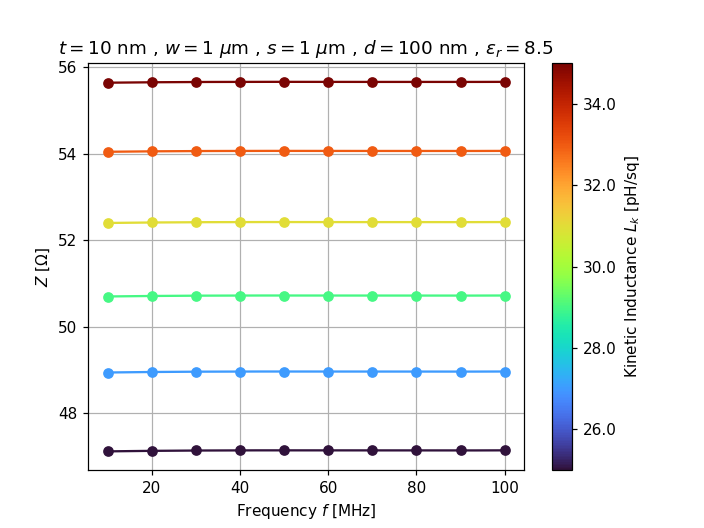

In [32]:
z0zer.update(Ldigits=0, Cdigits=0, Zdigits=0)
for tag in ['Lall' , 'Call', 'Zall']:
    z0zer.plot(tag)

<IPython.core.display.Javascript object>


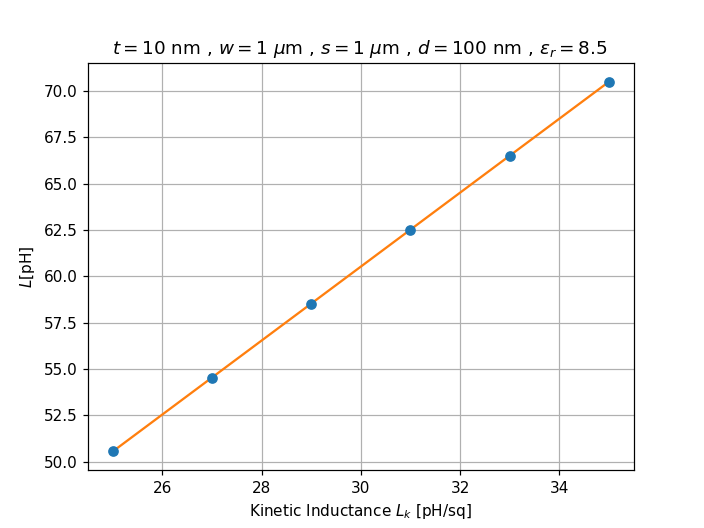

<IPython.core.display.Javascript object>


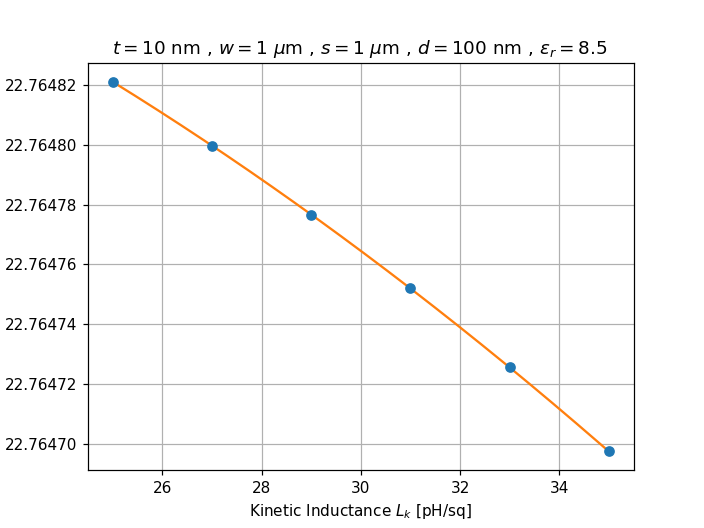

<IPython.core.display.Javascript object>


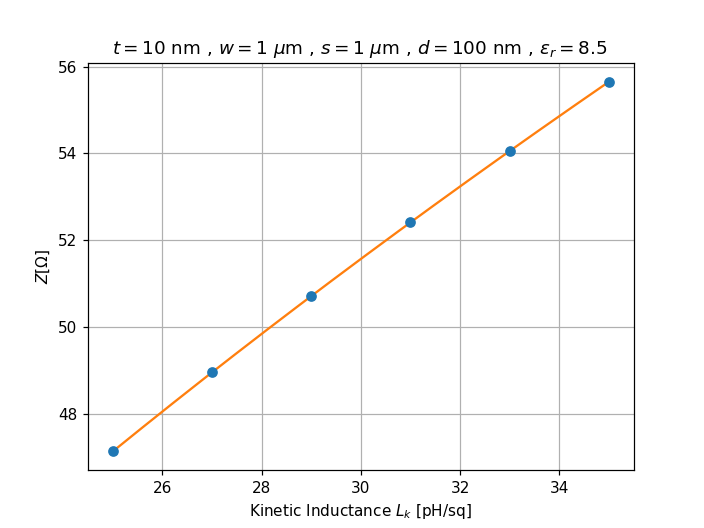

In [33]:
z0zer.update(Ldigits=2, Cdigits=0, Zdigits=0, isfit=True)

for x in ['L', 'C', 'Z']:
    z0zer.plot(x)


In [9]:
from twpazer.sreader import sidreader

In [10]:
pathname  = '/home/giachero/gsbox/kids_rd/DARTWARS/sonnet-sim/IMS-NIST/v2/simdata/8.5'
filenameC = 'fishbone-microstrip_d100_eps8.5_l11.0um_s1um_w1um_d100nm_320cells_C_geo_response_d_20240726_145417.sid'

sid = sidreader(data=sidreader(os.path.join(os.path.join(pathname,filenameC))).unique('merge'))

In [11]:
sid.compute('Y')

/home/giachero/work/repos-github/twpazer/src/twpazer/utils.py:196: RuntimeWarning: divide by zero encountered in log10
  return 20*np.log10(np.sqrt(I**2+Q**2)) if isdB else np.sqrt(I**2+Q**2)


In [12]:
sid.get()[0]

{'Lk': 25.0,
 'l': 11.0,
 'eps': 8.5,
 'data': array([[ 1.00000000e+07,  9.98952702e-01, -4.57547813e-02],
        [ 2.00000000e+07,  9.95813486e-01, -9.14084294e-02],
        [ 3.00000000e+07,  9.90590378e-01, -1.36860157e-01],
        [ 4.00000000e+07,  9.83296719e-01, -1.82009785e-01],
        [ 5.00000000e+07,  9.73951094e-01, -2.26758166e-01],
        [ 6.00000000e+07,  9.62577289e-01, -2.71007312e-01],
        [ 7.00000000e+07,  9.49204128e-01, -3.14660967e-01],
        [ 8.00000000e+07,  9.33865360e-01, -3.57624788e-01],
        [ 9.00000000e+07,  9.16599657e-01, -3.99806288e-01],
        [ 1.00000000e+08,  8.97450152e-01, -4.41115885e-01]]),
 'P1': array([[ 6.00000000e+07,  2.12582111e+03, -6.03640000e-05,
          1.65237710e+02,  0.00000000e+00,  0.00000000e+00,
          2.71134000e-04],
        [ 7.00000000e+07,  2.12582097e+03,  0.00000000e+00,
          1.65237708e+02,  0.00000000e+00,  0.00000000e+00,
          2.71134000e-04],
        [ 8.00000000e+07,  2.12582083e+03,

In [13]:
f   = sid.get()[0]['pars']['freq']
Y11 = sid.get()[0]['pars']['Y11mag']

from scipy.optimize import curve_fit

def model0(x, C, Lf):
    return 2*np.pi*x*C/(1-(Lf*C*(2*np.pi*x)**2)/3) 


def model(x, C):
    return 2*np.pi*x*C

guess = np.array([20e-12, 200e-12])

popt, pcov = curve_fit(model0, f, Y11, guess)

print(popt[0]/320*1e15)
print(popt[1]/320*1e12)

22.764635664140172
50.79340775607769


## Fit function for $Y_{11}$


$$
\displaystyle Y_{11}=j\,\frac{\omega\cdot n_{cell}\cdot C}{1-\displaystyle\frac{\omega^2 \cdot n_{cell}^2\cdot LC}{3}}
$$

<IPython.core.display.Javascript object>


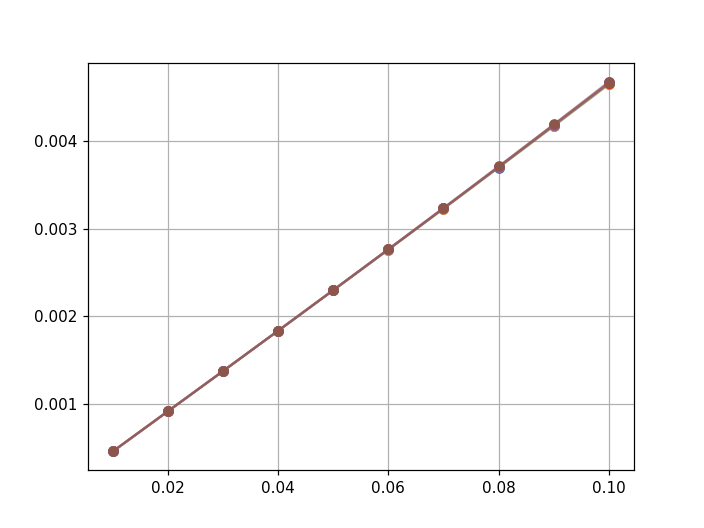

25.0
22.764635664140172
50.79340775607769
2.0317363102431076


27.0
22.764583814855435
54.81458533557597
2.0301698272435544


29.0
22.764527920049478
58.838193122920664
2.0289032111351952


31.0
22.76446797368662
62.864238091904454
2.02787864812595


33.0
22.764403951345713
66.89272323696694
2.0270522193020284


35.0
22.764335827614065
70.92365870331918
2.0263902486662624




In [14]:
plt.figure()
for s in sid:
    f   = s['pars']['freq']
    Y11 = s['pars']['Y11mag']

    guess = np.array([20e-12, 200e-12])    
    popt, pcov = curve_fit(model0, f, Y11, guess)
    
    f_fit = np.linspace(np.min(f), np.max(f), 1000);
        
    print(s['Lk'])
    print(popt[0]/320*1e15)
    print(popt[1]/320*1e12)
    print(popt[1]/320*1e12/(s['Lk']))
    print('\n')
        
    plt.plot(f/1e9, Y11, marker='o', ls='none')
    plt.plot(f_fit/1e9, model0(f_fit, *popt),  alpha=0.5, color=plt.gca().lines[-1].get_color())


In [15]:
sid.compute('LC')

/home/giachero/work/repos-github/twpazer/src/twpazer/utils.py:135: RuntimeWarning: divide by zero encountered in divide
  'C2'  : -1/(2*np.pi*Y['freq']*np.imag(1/Y['Y22'])),
/home/giachero/work/repos-github/twpazer/src/twpazer/utils.py:137: RuntimeWarning: divide by zero encountered in divide
  'L2'  : -1/(2*np.pi*Y['freq'])*np.imag(1/Y['Y21'])
/home/giachero/work/repos-github/twpazer/src/twpazer/utils.py:137: RuntimeWarning: invalid value encountered in divide
  'L2'  : -1/(2*np.pi*Y['freq'])*np.imag(1/Y['Y21'])


In [16]:
def model5(x, C, Lf):
    return C/(1-((2*np.pi*x)**2*Lf*C)/3)

## Fit function for $C_{1}$


$$
C_1 = \displaystyle -\frac{1}{\omega\cdot \operatorname{Im}\left(\displaystyle\frac{1}{Y_{11}} \right)}\quad\Rightarrow\quad
C_{1}=\frac{C}{1-\displaystyle\frac{\omega^2LC}{3}}
$$

<IPython.core.display.Javascript object>


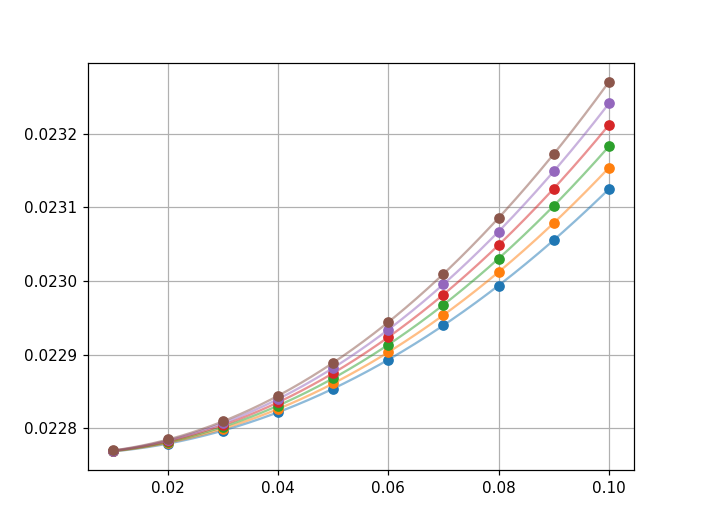

25.0
22.764820985555943
50.75338536686555
2.030135414674622


27.0
22.764799644568377
54.768002525671626
2.028444537987838


29.0
22.76477664909934
58.78454210280807
2.027053175958899


31.0
22.76475197094516
62.80301680526255
2.025903767911695


33.0
22.76472559987774
66.82342747313105
2.024952347670638


35.0
22.764697515829138
70.84578406844011
2.024165259098289




In [17]:
plt.figure()
for s in sid:
    f  = s['pars']['freq']
    C1 = s['pars']['C1']
    
    guess = np.array([20e-12, s['Lk']*1e-12])    
    popt, pcov = curve_fit(model5, f, C1, guess)
    
    f_fit = np.linspace(np.min(f), np.max(f), 1000);
    
    print(s['Lk'])
    print(popt[0]/320*1e15)
    print(popt[1]/320*1e12)
    print(popt[1]/320*1e12/s['Lk'])
    print('\n')

    
    plt.plot(f/1e9, C1/320*1e12, marker='o', ls='none')
    plt.plot(f_fit/1e9, model5(f_fit, *popt)/320*1e12,  alpha=0.5, color=plt.gca().lines[-1].get_color())
    
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

In [18]:
pathname  = '/home/giachero/gsbox/kids_rd/DARTWARS/sonnet-sim/IMS-NIST/v2/simdata/8.5'
filenameL = 'fishbone-microstrip_d100_eps8.5_l11.0um_s1um_w1um_d100nm_320cells_L_geo_response_d_20240726_145417.sid'

sid = sidreader(data=sidreader(os.path.join(os.path.join(pathname,filenameL))).unique('merge'))

In [19]:
sid.compute('Y')

/home/giachero/work/repos-github/twpazer/src/twpazer/utils.py:196: RuntimeWarning: divide by zero encountered in log10
  return 20*np.log10(np.sqrt(I**2+Q**2)) if isdB else np.sqrt(I**2+Q**2)


In [20]:
from scipy.optimize import curve_fit

def model7(x, C, L):
    return 1/(2*np.pi*x*L*(1+((2*np.pi*x)**2*L*C)/3)) 

<IPython.core.display.Javascript object>


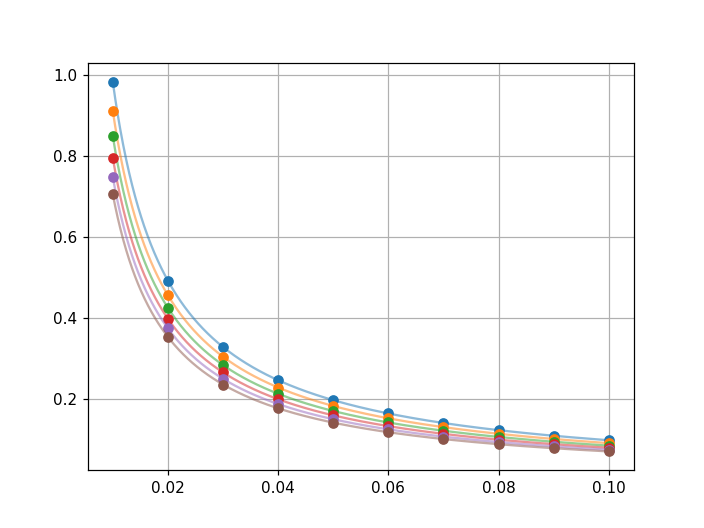

25.0
25.79006906498202
50.536726654921104
2.021469066196844


27.0
25.442271474895513
54.52400920563088
2.0194077483566995


29.0
25.163189210577404
58.51137719839579
2.017633696496407


31.0
24.919703807005902
62.499174130904606
2.0161023913195035


33.0
24.7389959723787
66.48658011332857
2.0147448519190476


35.0
24.596478657439405
70.47383650385224
2.0135381858243497




In [22]:
plt.figure()
for s in sid:
    f   = s['pars']['freq']
    Y11 = s['pars']['Y11mag']

    guess = np.array([20e-12, 200e-12])    
    popt, pcov = curve_fit(model7, f, Y11, guess)
    
    f_fit = np.linspace(np.min(f), np.max(f), 1000);
        
    print(s['Lk'])
    print(popt[0]/320*1e15)
    print(popt[1]/320*1e12)
    print(popt[1]/320*1e12/(s['Lk']))
    print('\n')
        
    plt.plot(f/1e9, Y11, marker='o', ls='none')
    plt.plot(f_fit/1e9, model7(f_fit, *popt),  alpha=0.5, color=plt.gca().lines[-1].get_color())

In [23]:
sid.compute('LC')

In [24]:
def model8(x, C, L):
    return L+((2*np.pi*x*L)**2*C)/3

<IPython.core.display.Javascript object>


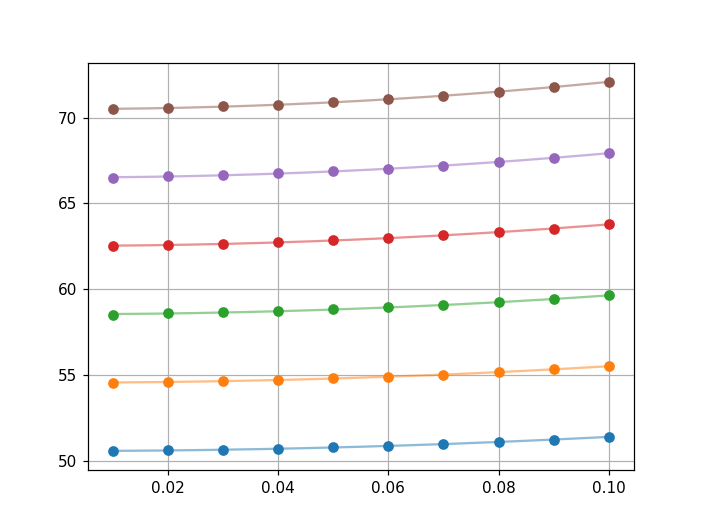

25.0
23.943689651135436
50.560449173154346
2.0224179669261737


27.0
23.87162115093302
54.5474484166067
2.0202758672817294


29.0
23.818006334050203
58.534445010664804
2.0184291382987865


31.0
23.77731015894186
62.52147711689207
2.016821842480389


33.0
23.75215847241058
66.5083350535944
2.0154040925331635


35.0
23.738129811945072
70.49504916677715
2.0141442619079184




In [25]:
plt.figure()
for s in sid:
    f  = s['pars']['freq']
    L1 = s['pars']['L1']
    
    guess = np.array([20e-12, s['Lk']*1e-12])    
    popt, pcov = curve_fit(model8, f, L1, guess)
    
    f_fit = np.linspace(np.min(f), np.max(f), 1000);
    
    print(s['Lk'])
    print(popt[0]/320*1e15)
    print(popt[1]/320*1e12)
    print(popt[1]/320*1e12/s['Lk'])
    print('\n')

    
    plt.plot(f/1e9, L1/320*1e12, marker='o', ls='none')
    plt.plot(f_fit/1e9, model8(f_fit, *popt)/320*1e12,  alpha=0.5, color=plt.gca().lines[-1].get_color())
    
plt.ticklabel_format(useOffset=False, style='plain', axis='y')